# How are in-demand skills trending for Data Analysts?


Import Libraries and Data


In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

Filter the data for data analysts in USA and explode it by job skills

In [3]:
df_USA_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')]

df_USA_DA['month'] = df_USA_DA['job_posted_date'].dt.month

df_USA_DA = df_USA_DA.explode('job_skills')

df_USA_DA

C:\Users\hed way\AppData\Local\Temp\ipykernel_14944\3521027305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_DA['month'] = df_USA_DA['job_posted_date'].dt.month


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['...",7
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",1


Create pivot table , sort columns by count and get top 5 skills  

In [4]:
df_pivot = df_USA_DA.pivot_table(index= 'month', columns='job_skills', aggfunc='size', fill_value= 0)

df_pivot.loc['total']=df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending= False).index]
df_pivot = df_pivot.drop('total')

df_pivot = df_pivot.iloc[: , :5]

df_pivot

job_skills,sql,excel,tableau,python,sas
month,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


Change month number to month name 

In [5]:
df_pivot = df_pivot.reset_index()

df_pivot['month name'] = df_pivot['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot = df_pivot.set_index('month name')
df_pivot = df_pivot.drop(columns=['month'])


df_pivot

job_skills,sql,excel,tableau,python,sas
month name,,,,,
Jan,4601,3592,2488,2254,1832
Feb,3168,2587,1676,1618,1212
Mar,3226,2661,1804,1683,1238
Apr,3220,2549,1789,1679,1302
May,2581,2118,1432,1349,972
Jun,2862,2382,1628,1609,984
Jul,2609,2118,1533,1438,996
Aug,3414,2731,1951,2025,1276
Sep,2295,1801,1353,1229,856


Plot the monthle skill count 

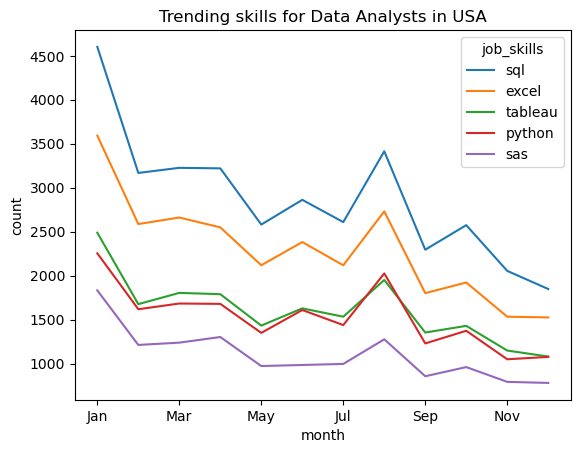

In [9]:
df_pivot.plot(kind= 'line')


plt.ylabel('count')
plt.xlabel('month')
plt.title('Trending skills for Data Analysts in USA')
plt.show()